Гребенщиков Данила Александрович, практика 3 по факультативу ИИ


In [1]:
from google.colab import drive # подключение библиотеки для работы с google disk
drive.mount('/content/training')

Mounted at /content/training


In [2]:
name_of_file = 'checkins.dat'
path = '/content/training/MyDrive/mirea_ai/' + name_of_file # путь до файла

In [3]:
path

'/content/training/MyDrive/mirea_ai/checkins.dat'

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv(path, sep='|', header=0, skipinitialspace=True) # преобразование в отдельные столбцы из одного

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
"""names=['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at']
df = pd.read_csv(path, 
                 sep="|", 
                 skiprows=2,  
                 names=['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at'],
                 engine='python')""" # чтобы было для дальнейших работ

'names=[\'id\', \'user_id\', \'venue_id\', \'latitude\', \'longitude\', \'created_at\']\ndf = pd.read_csv(path, \n                 sep="|", \n                 skiprows=2,  \n                 names=[\'id\', \'user_id\', \'venue_id\', \'latitude\', \'longitude\', \'created_at\'],\n                 engine=\'python\')'

Поздно посмотрел код, который Вы показали для лучшего извлечения данных, решил не менять код.

In [7]:
data

,id,user_id,venue_id,latitude,longitude,created_at
0,---------+---------+----------+---------------...,NaN,NaN,NaN,NaN,NaN
1,984301,2041916.0,5222.0,NaN,NaN,2012-04-21 17:39:01
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
3,984315,1764391.0,5222.0,NaN,NaN,2012-04-21 17:37:18
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
...,...,...,...,...,...,...
1021963,956119,1139114.0,29488.0,42.439479,-83.743830,2012-04-13 11:36:44
1021964,956447,2088020.0,4432.0,NaN,NaN,2012-04-13 12:58:05
1021965,956733,960666.0,60.0,42.331427,-83.045754,2012-04-13 21:56:19
1021966,957139,1771518.0,10935.0,NaN,NaN,2012-04-14 02:44:52


In [8]:
print(data.columns)

Index(['id    ', 'user_id ', 'venue_id ', 'latitude      ', 'longitude     ',
       'created_at      '],
      dtype='object')


In [9]:
data

,id,user_id,venue_id,latitude,longitude,created_at
0,---------+---------+----------+---------------...,NaN,NaN,NaN,NaN,NaN
1,984301,2041916.0,5222.0,NaN,NaN,2012-04-21 17:39:01
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
3,984315,1764391.0,5222.0,NaN,NaN,2012-04-21 17:37:18
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
...,...,...,...,...,...,...
1021963,956119,1139114.0,29488.0,42.439479,-83.743830,2012-04-13 11:36:44
1021964,956447,2088020.0,4432.0,NaN,NaN,2012-04-13 12:58:05
1021965,956733,960666.0,60.0,42.331427,-83.045754,2012-04-13 21:56:19
1021966,957139,1771518.0,10935.0,NaN,NaN,2012-04-14 02:44:52


In [10]:
data = data.drop(['id    '], axis='columns')

In [11]:
data = data.drop(['user_id ', 'venue_id ', 'created_at      '], axis='columns') # удаление столбцов

In [12]:
data

,latitude,longitude
0,NaN,NaN
1,NaN,NaN
2,38.895112,-77.036366
3,NaN,NaN
4,33.800745,-84.410520
...,...,...
1021963,42.439479,-83.743830
1021964,NaN,NaN
1021965,42.331427,-83.045754
1021966,NaN,NaN


In [13]:
new_l = {'latitude      ': 'latitude', 'longitude     ': 'longitude'} # переименование столбцов
data = data.rename(columns = new_l)
data.columns

Index(['latitude', 'longitude'], dtype='object')

In [14]:
data = data.dropna() # удаление пустых строк
data

,latitude,longitude
2,38.895112,-77.036366
4,33.800745,-84.410520
8,45.523452,-122.676207
10,40.764462,-111.904565
11,33.448377,-112.074037
...,...,...
1021960,40.850100,-73.866246
1021961,33.748995,-84.387982
1021962,42.765366,-71.467566
1021963,42.439479,-83.743830


In [15]:
data = data.head(100000) # выбор первых 100000 строк

In [16]:
data

,latitude,longitude
2,38.895112,-77.036366
4,33.800745,-84.410520
8,45.523452,-122.676207
10,40.764462,-111.904565
11,33.448377,-112.074037
...,...,...
233789,33.575000,-117.725556
233790,37.629349,-122.400087
233794,29.762884,-95.383061
233798,32.802955,-96.769923


In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [18]:
ms = MeanShift(bandwidth=0.1, bin_seeding=True)
ms.fit(data)

MeanShift(bandwidth=0.1, bin_seeding=True, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [19]:
import numpy as np

In [20]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [21]:
labels

array([ 5,  7, 28, ..., 23, 19,  4])

In [22]:
import heapq

In [23]:
arr = [0 for x in range(3093)]
for i in range(len(labels)):
  arr[labels[i]] += 1
max_20 = heapq.nlargest(20, range(len(arr)), arr.__getitem__) # ищет 20 максимальных элементов
max_20

[0, 2, 1, 4, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 14, 18, 19, 21, 22]

In [24]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [25]:
print('number of clusters = %d' % n_clusters_) # вывод количества кластеров

number of clusters = 3093


In [26]:
import matplotlib.pyplot as plt

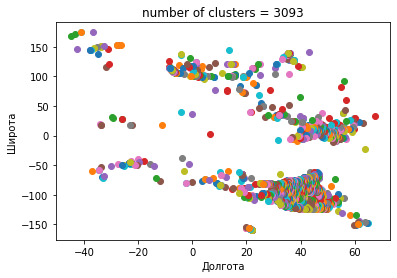

In [27]:
for k in range(n_clusters_):
  plt.scatter(cluster_centers[k][0], cluster_centers[k][1])

plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('number of clusters = %d' % n_clusters_)
plt.show()

In [28]:
for i in max_20: # выводим центры 20 максимальных кластеров
  print(cluster_centers[i])

[ 40.7177164  -73.99183542]
[  33.44841049 -112.07400428]
[  33.44638027 -111.90188756]
[  37.68868157 -122.40933037]
[ 41.87824378 -87.62984336]
[ 38.88616522 -77.04878333]
[  33.35734456 -111.82265411]
[ 33.76663623 -84.39328918]
[ 42.36321864 -71.07368761]
[  47.60624472 -122.33204383]
[  36.11722914 -115.17107342]
[  34.06039755 -118.24870903]
[ 44.97794782 -93.26730089]
[ 30.26718362 -97.74311928]
[ 39.95168037 -75.16273592]
[  39.73583015 -104.98658043]
[  32.98089338 -117.07811798]
[ 32.80302054 -96.76989743]
[  32.71134443 -117.15363875]
[  32.22171315 -110.92653515]


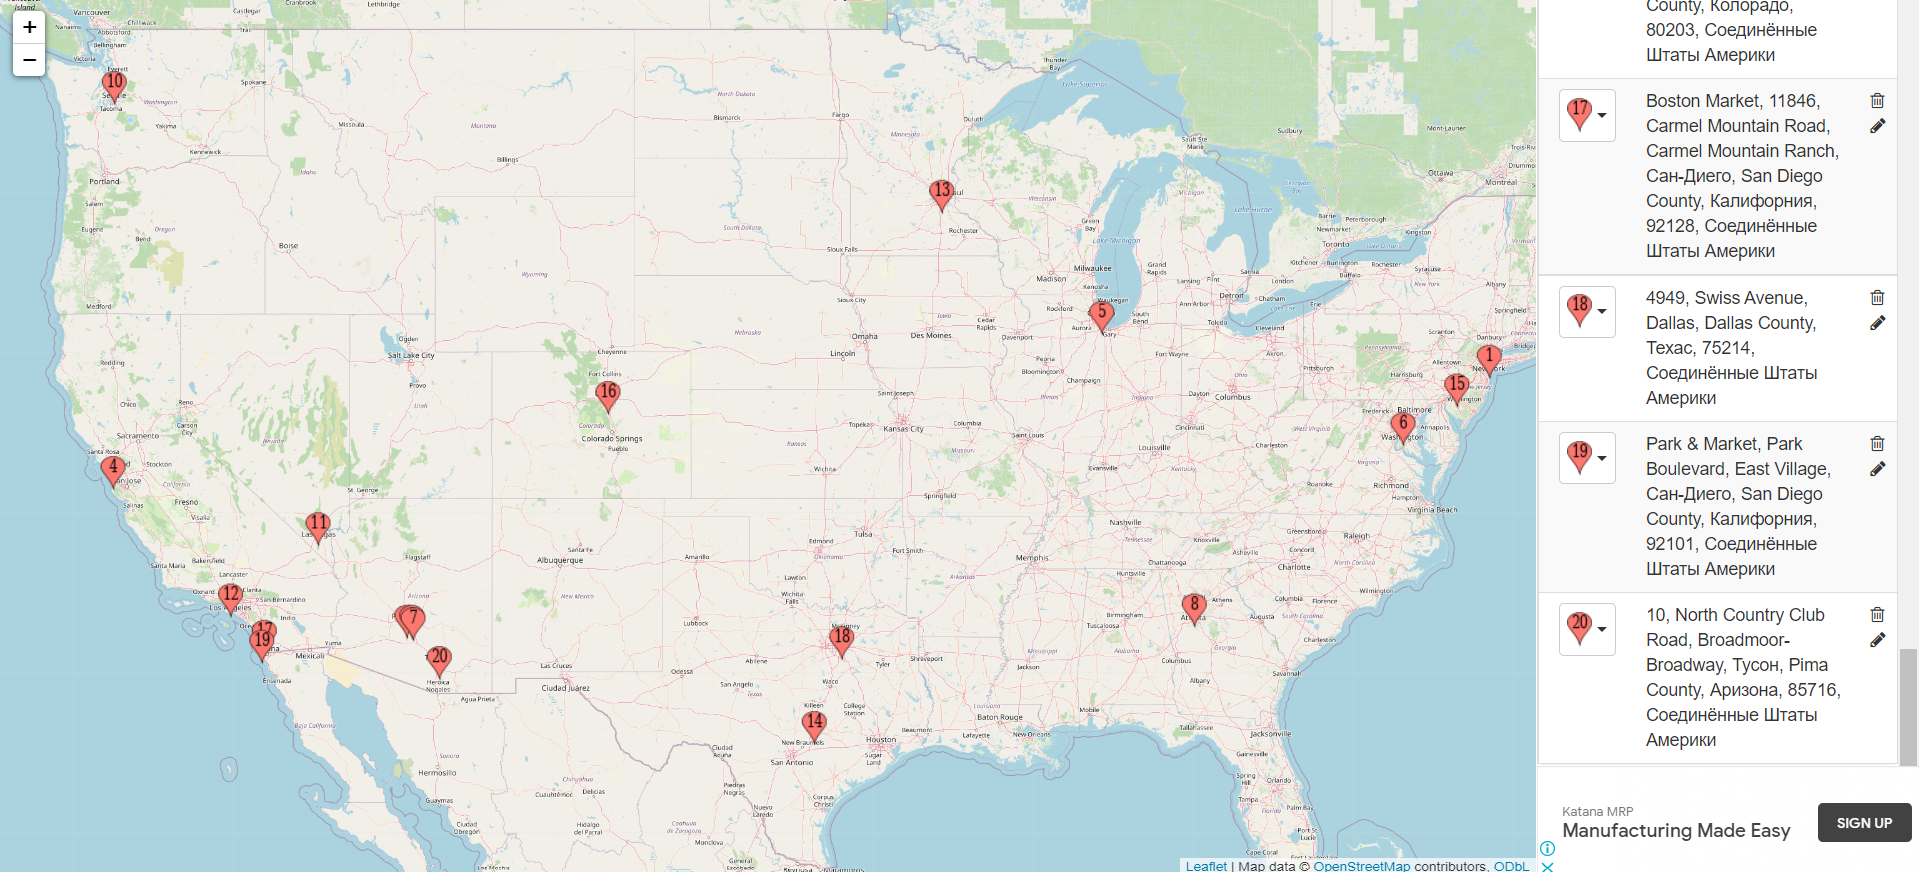

Информация для повышения качества рекомендации: информация о потоке людей, проходящих через данное место, местоположение самого билборда - не закрывает ли какая-то постройка его видимость, информация о регионах, которые обслуживает наша компания - в некоторых регионах она не может работать, следовательно будет бесполезно размещать рекламу, так как никто не предоставит услугу или подготовку к круизу, информация о доходах людей в регионах, о предрасположенности к путешествиям, водным путешествиям, доступность локации к ближайшим портам, откуда отправляется круизный лайнер. 